In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
import scipy as sc
import pandas as pd

C:\ProgramData\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\ProgramData\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
price_data = pd.read_csv("../../price_filled2.csv", sep = ";")

tab_price = price_data.to_numpy()[:,3:]
dates_tab = price_data.columns[2:].to_numpy(dtype = np.str)
tab_price.shape


<ipython-input-2-c2153bfa6f88>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dates_tab = price_data.columns[2:].to_numpy(dtype = np.str)


(756, 1824)

In [3]:
current_month = dates_tab[0][:-3]
# print(current_month)
month_first_index = {current_month : 0}

for i in range(len(dates_tab)) :
    if (dates_tab[i][-4] != current_month[-1]) :
        current_month = dates_tab[i][:-3]
        month_first_index[current_month] = i
#     print(dates_tab[i][-4], current_month[-1])

print(month_first_index)

{'2014-01': 0, '2014-02': 22, '2014-03': 42, '2014-04': 63, '2014-05': 84, '2014-06': 103, '2014-07': 123, '2014-08': 145, '2014-09': 165, '2014-10': 187, '2014-11': 210, '2014-12': 229, '2015-01': 251, '2015-02': 272, '2015-03': 292, '2015-04': 314, '2015-05': 335, '2015-06': 352, '2015-07': 374, '2015-08': 396, '2015-09': 417, '2015-10': 439, '2015-11': 461, '2015-12': 481, '2016-01': 503, '2016-02': 523, '2016-03': 544, '2016-04': 566, '2016-05': 587, '2016-06': 607, '2016-07': 629, '2016-08': 649, '2016-09': 671, '2016-10': 693, '2016-11': 714, '2016-12': 734, '2017-01': 756, '2017-02': 778, '2017-03': 798, '2017-04': 821, '2017-05': 840, '2017-06': 860, '2017-07': 881, '2017-08': 901, '2017-09': 921, '2017-10': 942, '2017-11': 964, '2017-12': 985, '2018-01': 1005, '2018-02': 1027, '2018-03': 1047, '2018-04': 1069, '2018-05': 1089, '2018-06': 1108, '2018-07': 1129, '2018-08': 1151, '2018-09': 1173, '2018-10': 1193, '2018-11': 1216, '2018-12': 1237, '2019-01': 1257, '2019-02': 1279,

In [4]:
indexes = np.array(list(month_first_index.values()))
total = []
for i in range(len(month_first_index)-1) :
    X = tab_price[:,indexes[i]:indexes[i+1]].mean(axis = 1)
    total.append(X)
total.append(tab_price[:,indexes[-1]:].mean(axis = 1))
result = np.column_stack(total)
n_data = result.shape[1]

In [5]:
IPC_df = pd.read_csv("../../valeurs_mensuelles.csv", sep = ";")
dates = IPC_df["Libellé"].to_numpy()[3:]
dates = dates[::-1].copy()

IPC = IPC_df[IPC_df.columns[1]].iloc[3:].to_numpy(dtype = np.float)[::-1]

IPC_selec = IPC[-n_data:]
IPC_selec.shape

<ipython-input-5-85d7e4731cfd>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  IPC = IPC_df[IPC_df.columns[1]].iloc[3:].to_numpy(dtype = np.float)[::-1]


(89,)

In [6]:
X = result.copy()
X0 = np.transpose(X) #juste les données de base
X1 = np.transpose(np.vstack((X[:,1:], IPC_selec[:-1]))) #on donne en plus le point t-1
X2 = np.transpose(np.vstack((np.transpose(X1)[:,1:], IPC_selec[:-2]))) #on donne en plus le point t-2

Y0 = IPC_selec
Y1 = IPC_selec[1:]
Y2 = IPC_selec[2:]



In [7]:
X1.shape


(88, 757)

In [8]:
##standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_std = scaler.fit_transform(X1)

stddv_Y1 = Y1.std()
mean_Y1 = Y1.mean()
print(mean_Y1, stddv_Y1)

scaler2 = StandardScaler()
Y1_std = scaler2.fit_transform(Y1.reshape(-1, 1))
stddv_Y1_std = Y1_std.std()
mean_Y1_std = Y1_std.mean()
print(mean_Y1_std, stddv_Y1_std)

110.16397727272728 11.012065546045054
-6.282853025719636e-16 1.0


In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=80)
X1_std_pca = pca.fit_transform(X1_std)
X1_std_pca

array([[ 2.32046202e+01,  1.66370298e+01,  1.35244025e+01, ...,
        -1.24524842e-02, -1.32703382e-03, -8.06686788e-03],
       [ 2.28636196e+01,  1.54308041e+01,  1.22434042e+01, ...,
         1.34181160e-01,  8.07244901e-03,  1.81128900e-02],
       [ 2.29480904e+01,  1.46613373e+01,  1.19197642e+01, ...,
        -1.94007983e-01,  2.88806072e-02,  2.11917702e-02],
       ...,
       [-2.22753348e+01,  1.34645284e+01, -9.58842768e+00, ...,
         1.57716417e-01, -1.01007622e-01,  1.34906655e-01],
       [-2.27970076e+01,  1.36598698e+01, -9.23072386e+00, ...,
        -2.00710424e-01,  3.41844939e-02,  7.31675851e-02],
       [-2.22470698e+01,  1.36953452e+01, -8.25636759e+00, ...,
         9.44473679e-03,  2.10523997e-02, -1.82886814e-01]])

In [11]:
X1_std_pca.shape

(88, 80)

In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X1_std_pca, Y1_std, test_size = .2)
# Xtrain = Xtrain.T
# Xtest = Xtest.T

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
alpha = 0.9
params = {'n_estimators': 350,
          'max_depth': 6,
          'alpha' : alpha,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}

In [15]:
reg_up = GradientBoostingRegressor(**params)

reg_up = reg_up.fit(Xtrain, Ytrain)

y_upper_test = reg_up.predict(Xtest)*stddv_Y1 + mean_Y1
y_upper_train = reg_up.predict(Xtrain)*stddv_Y1 + mean_Y1

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [16]:
reg_low = GradientBoostingRegressor(**params)
reg_low.set_params(alpha=1.0 - alpha)
reg_low = reg_low.fit(Xtrain, Ytrain)

y_lower_test = reg_low.predict(Xtest)*stddv_Y1 + mean_Y1
y_lower_train = reg_low.predict(Xtrain)*stddv_Y1 + mean_Y1

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


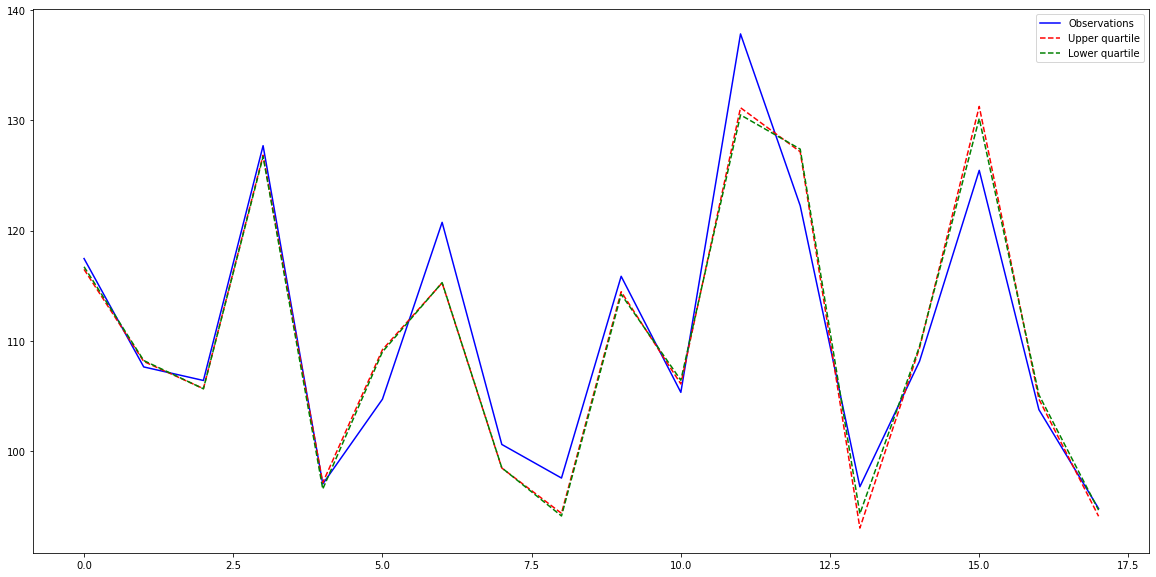

In [17]:
fig = plt.figure(figsize = (20,10))

line3 = plt.plot(Ytest*stddv_Y1 + mean_Y1,'b',label=u'Observations')

line1 = plt.plot(y_upper_test, 'r--', label='Upper quartile')
line2 = plt.plot(y_lower_test, 'g--',label='Lower quartile')


# plt.fill_between(range(0,len(y_upper_train)),y_upper_train, y_lower_train, alpha =0.1)

plt.legend()
# plt.xlim(50,60)

plt.show()

In [18]:
def dist(upper_bound, lower_bound, obs) :
    if obs<= upper_bound and obs <= lower_bound :
        return (lower_bound-obs)**2
    elif obs>= upper_bound and obs >= lower_bound :
        return (obs - upper_bound)**2
    else :
        return 0

In [19]:
def cout(upper, lower, obs) :
    S = 0
    for i in range(len(obs)) :
        S += dist(upper[i], lower[i], obs[i])
    return (S**.5)/len(obs)

In [20]:
def mean_size(upper, lower) :
    S = 0
    for i in range(len(upper)) :
        S += abs(upper[i]-lower[i])
    return S/len(upper)

In [35]:
cout(y_upper_test, y_lower_test, Ytest*stddv_Y1 + mean_Y1)

array([0.74753376])

In [22]:
X2[-1].shape


(758,)

In [52]:
from sklearn.preprocessing import StandardScaler


#no value 

scaler0 = StandardScaler()
X0_std = scaler0.fit_transform(X0)

stddv_Y0 = Y0.std()
mean_Y0 = Y0.mean()

scaler01 = StandardScaler()
Y0_std = scaler01.fit_transform(Y0.reshape(-1, 1))
stddv_Y0_std = Y0_std.std()
mean_Y0_std = Y0_std.mean()


## t-1 value

scaler1 = StandardScaler()
X1_std = scaler1.fit_transform(X1)

stddv_Y1 = Y1.std()
mean_Y1 = Y1.mean()

scaler11 = StandardScaler()
Y1_std = scaler11.fit_transform(Y1.reshape(-1, 1))
stddv_Y1_std = Y1_std.std()
mean_Y1_std = Y1_std.mean()

## t-1 and t-2 values

scaler2 = StandardScaler()
X2_std = scaler2.fit_transform(X2)

stddv_Y2 = Y2.std()
mean_Y2 = Y2.mean()

scaler21 = StandardScaler()
Y2_std = scaler21.fit_transform(Y2.reshape(-1, 1))
stddv_Y2_std = Y2_std.std()
mean_Y2_std = Y2_std.mean()

np.ravel(Y2_std).shape

(87,)

In [53]:
def train_and_predict(X, Y, params,mean_Y, stddv_Y) :
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, np.ravel(Y), test_size = .2)
    
    reg_up = GradientBoostingRegressor(**params)

    reg_up = reg_up.fit(Xtrain, Ytrain)

    y_upper_test = reg_up.predict(Xtest)*stddv_Y + mean_Y
    y_upper_train = reg_up.predict(Xtrain)*stddv_Y + mean_Y
    
    
    reg_low = GradientBoostingRegressor(**params)
    reg_low.set_params(alpha=1.0 - alpha)
    reg_low = reg_low.fit(Xtrain, Ytrain)

    y_lower_test = reg_low.predict(Xtest)*stddv_Y + mean_Y
    y_lower_train = reg_low.predict(Xtrain)*stddv_Y + mean_Y
    test_cost = cout(y_upper_test, y_lower_test, Ytest*stddv_Y + mean_Y)
    train_cost = cout(y_upper_train, y_lower_train, Ytrain*stddv_Y + mean_Y)
    
    incert_mean_size_test = mean_size(y_upper_test, y_lower_test)
    incert_mean_size_train = mean_size(y_upper_train, y_lower_train)
    
    
    return test_cost, train_cost, incert_mean_size_test, incert_mean_size_train

In [54]:
def param_tunning(n_esti, max_d, alpha, min_sa, lr, n_compo, n_iter) :
    
    test_cost0, train_cost0, incert_mean_size_test0, incert_mean_size_train0 = 0, 0, 0, 0
    test_cost1, train_cost1, incert_mean_size_test1, incert_mean_size_train1 = 0, 0, 0, 0
    test_cost2, train_cost2, incert_mean_size_test2, incert_mean_size_train2 = 0, 0, 0, 0
    
    
    params = {'n_estimators': n_esti,
          'max_depth': max_d,
          'alpha' : alpha,
          'min_samples_split': min_sa,
          'learning_rate': lr,
          'loss': 'ls'}
    
    
    # no past value
    
    pca0 = PCA(n_components=n_compo)
    X0_std_pca = pca0.fit_transform(X0_std)
    X0_std_pca
    
    
    # t-1 value
    
    pca1 = PCA(n_components=n_compo)
    X1_std_pca = pca1.fit_transform(X1_std)
    X1_std_pca
    
    # t-1 and t-2 values
    
    pca2 = PCA(n_components=n_compo)
    X2_std_pca = pca2.fit_transform(X2_std)
    X2_std_pca
    
    for i in range(n_iter) :
        a, b, c, d = train_and_predict(X0_std_pca, Y0_std, params, mean_Y0, stddv_Y0)
        test_cost0 += a
        train_cost0 +=b
        incert_mean_size_test0 +=c
        incert_mean_size_train0 +=d
        
        a, b, c, d = train_and_predict(X1_std_pca, Y1_std, params, mean_Y1, stddv_Y1)
        test_cost1 += a
        train_cost1 +=b
        incert_mean_size_test1 +=c
        incert_mean_size_train1 +=d
        
        a, b, c, d = train_and_predict(X2_std_pca, Y2_std, params, mean_Y2, stddv_Y2)
        test_cost2 += a
        train_cost2 +=b
        incert_mean_size_test2 +=c
        incert_mean_size_train2 +=d
        

    print(n_esti, max_d, alpha, min_sa, lr, n_compo)
    return [["0",n_esti, max_d, alpha, min_sa, lr, n_compo, test_cost0/n_iter, train_cost0/n_iter, incert_mean_size_test0/n_iter, incert_mean_size_train0/n_iter],
    ["1",n_esti, max_d, alpha, min_sa, lr, n_compo, test_cost1/n_iter, train_cost1/n_iter, incert_mean_size_test1/n_iter, incert_mean_size_train1/n_iter],
    ["2",n_esti, max_d, alpha, min_sa, lr, n_compo, test_cost2/n_iter, train_cost2/n_iter, incert_mean_size_test2/n_iter, incert_mean_size_train2/n_iter]]

In [55]:
param_tunning(350, 6, .9, 5, .1, 80, 1)

350 6 0.9 5 0.1 80


[['0',
  350,
  6,
  0.9,
  5,
  0.1,
  80,
  0.5387379678948477,
  3.8655942503707116e-15,
  0.4118355733952883,
  5.4041278494430154e-15],
 ['1',
  350,
  6,
  0.9,
  5,
  0.1,
  80,
  0.587428497690758,
  1.4497971693862257e-15,
  0.2500580162323824,
  2.842170943040401e-15],
 ['2',
  350,
  6,
  0.9,
  5,
  0.1,
  80,
  0.9188637690682815,
  1.7596753030557855e-15,
  0.2761171206242036,
  2.6774074101105225e-15]]